<a href="https://colab.research.google.com/github/samsee/hgmldl2023/blob/main/hgmldl2023_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7장. 딥러닝

## 인공신경망

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

* 이미지로 보기

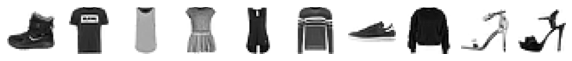

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

### 로지스틱 회귀로 분류하기

In [ ]:
# 전처리
# 정규화(255 -> 1)
train_scaled = train_input / 255.0

# 2차원 이미지 -> 1차원 벡터
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
np.mean(scores['test_score'])

0.8196000000000001

* 로지스틱 회귀 복습
  * 각 클래스에 맞는 선형방정식의 가중치와 절편 찾기
  * 분류 : 샘플 값을 모든 방정식에 적용 -> 소프트맥스로 확률 계산

### 인공 신경망



In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

# 인공신경망에서는 교차 검증 대신 별도로 검증 데이터셋 떼어내서 쓴다.
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# 모델 만들기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

model = keras.Sequential(dense)

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 2ms/step - loss: 0.6079 - accuracy: 0.7934
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4744 - accuracy: 0.8394
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4516 - accuracy: 0.8477
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4377 - accuracy: 0.8503
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4290 - accuracy: 0.8557


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4359 - accuracy: 0.8521


[0.4359058737754822, 0.8520833253860474]

## 심층 신경망

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# 심층 신경망 : 은닉층, 출력층 만들기
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [ ]:
# 두 개의 레이어로 구성
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()
# 출력층(dense_2)가 아닌 모든 층은 은닉층(hidden layer)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 2ms/step - loss: 0.5674 - accuracy: 0.8056
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4116 - accuracy: 0.8506
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3769 - accuracy: 0.8643
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3534 - accuracy: 0.8724
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3361 - accuracy: 0.8773


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8690


[0.3567010164260864, 0.8690000176429749]

### 신경망을 쌓는 여러 API

* 하나씩 만들어서 모델을 만들 때 리스트로 전달 : `model = keras.Sequential([dense1, dense2])`
* 어차피 레이어는 따로 쓸모가 없으니 바로 생성
```python
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')
```
* model.add 로 하나씩 추가
```python
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
```

### 렐루 함수



In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # 28x28 -> 783로 바꾸던 것을 대체
model.add(keras.layers.Dense(100, activation='relu')) # 할 렐루 ...
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 이제 이거 안해도 됨. train_scaled.reshape(-1, 28*28)
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5330 - accuracy: 0.8123
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3931 - accuracy: 0.8582
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3527 - accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3310 - accuracy: 0.8810
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8878


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3785 - accuracy: 0.8719


[0.3785383403301239, 0.871916651725769]

In [ ]:
# 예측하기
sample = train_scaled[0:1]
model.predict(sample)

1/1 [==============================] - 0s 63ms/step


array([[1.7279699e-09, 7.1361306e-11, 1.7421596e-10, 2.7459507e-10,
        1.7253411e-10, 3.1761709e-04, 6.4490252e-10, 9.9956959e-01,
        4.2210359e-05, 7.0553207e-05]], dtype=float32)

In [ ]:
784 * 100 + 100

78500

### 옵티마이저

* 다양한 옵티마이저가 있으며 이것도 학습에 영향을 미친다..
* 하이퍼파라미터 중 하나

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2900 - accuracy: 0.8929
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2767 - accuracy: 0.8974
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2654 - accuracy: 0.9019
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9048
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2451 - accuracy: 0.9087


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8792


[0.33799707889556885, 0.8791666626930237]

## 신경망 모델 훈련

* 여러 도구들..

In [ ]:
# 모델 생성 유틸리티 함수
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
# 에포크별 손실, 정확도 볼 수 있다
history.history

{'loss': [0.28998619318008423,
  0.27674028277397156,
  0.26539021730422974,
  0.2554301619529724,
  0.2450801581144333],
 'accuracy': [0.8929166793823242,
  0.8973749876022339,
  0.9018750190734863,
  0.9048333168029785,
  0.9086666703224182]}

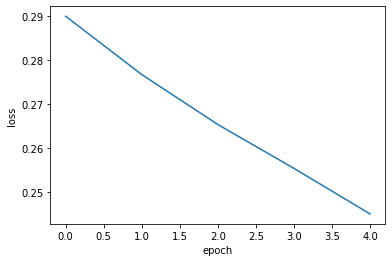

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

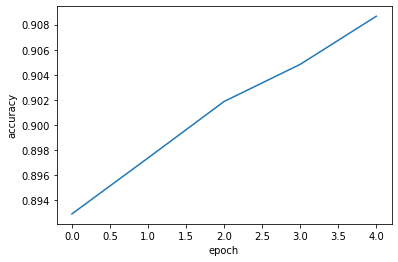

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

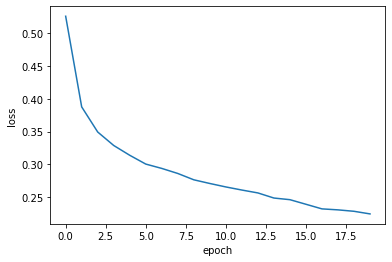

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증 손실

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target)) # 검증 데이터를 따로 넘겨줄 수 있다.

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

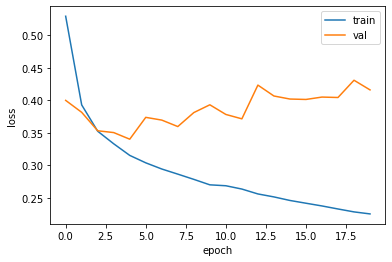

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 5 에포크 이후로 훈련 세트와 검증 세트의 손실이 벌어진다. 과대적합..

In [ ]:
# 과대적합 해소를 위해..
# 옵티마이저를 adam으로 교체해보자
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

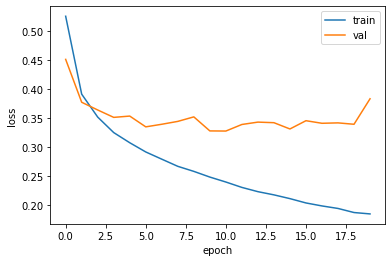

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 조금 나아진 것 같은데..뒤에 또 튀네..

### 드롭아웃(규제)

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

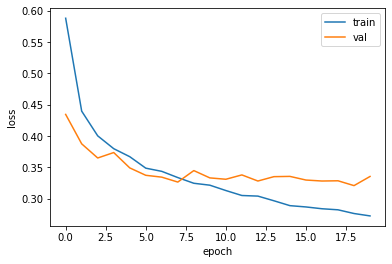

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 모델 저장과 복원

* 학습된 파라미터 저장하기: save_weights(파일명), save_weights(파일명.h5)
  * HDF5 포맷
  * 불러오기 load_weights: 모델이 동일해야 함.
* 모델과 파라미터 함께 저장 : save(파일명), save(파일명.h5)
* 학습을 다 해놓고 적절한 에포크를 선택해 다시 학습을 하는 것은 비효율
* 

In [ ]:
# 과대적합이 안 생기는 적절한 에포크로 다시 학습..
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [ ]:
model.save_weights('model-weights.h5') # 파라미터만 저장
model.save('model-whole.h5') # 모델과 파라미터 저장

In [ ]:
# 예측
pred = model.predict(val_scaled)

375/375 [==============================] - 1s 2ms/step


In [ ]:
from tabulate import tabulate

# print(tabulate(pred))

In [ ]:
# 검증 세트로 평가해보기
import numpy as np

val_labels = np.argmax(pred, axis=-1)
print(np.mean(val_labels == val_target))

0.88


### 콜백

* 조기 종료, 학습 중간에 모델 저장하기 등

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

16


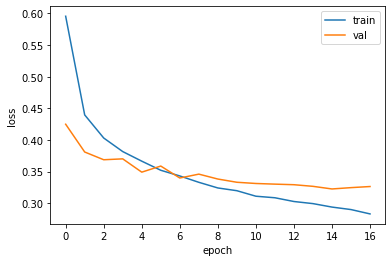

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.8841


[0.32264599204063416, 0.8840833306312561]